In [2]:
from megs.data.galaxy import Galaxy
import numpy as np
import matplotlib.pyplot as plt
basepath = "/export/data/ucakir/TNG100/TNG100-1/output/"

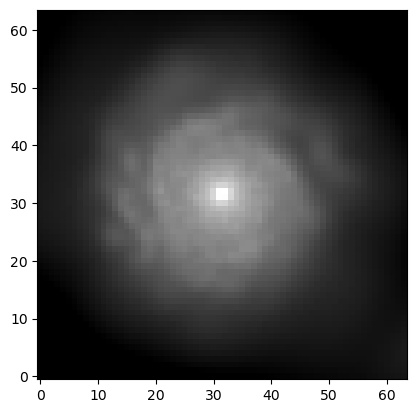

In [8]:
g = Galaxy("IllustrisTNG", halo_id=20, particle_type="stars", base_path=basepath, snapshot=99)
img = g.get_image("Masses", normed = True)

plt.imshow(img, origin="lower", cmap = "gray")

In [2]:
from megs.data import DataLoader

In [6]:
from megs.model.mPCA import mPCA
from megs.data import image, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("paper")
#Load Data
data = DataLoader("megs/data/galaxy_data.hdf5")

# Define Normalization
norm = image.norm # Normalization function
lower = 0.25
upper = 1.0
norm_function_args = {"Masses": {"takelog": True, "plusone": True,"lower": lower, "upper": upper},
                     "GFM_Metallicity": {"takelog": True, "plusone": True, "lower": 0.1, "upper": upper},
                     "GFM_StellarFormationTime": {"takelog": True, "plusone": True, "lower": 0.1, "upper": upper},
                    
}

# Define Model
mm = mPCA(data, norm_function = norm, norm_function_kwargs=norm_function_args, dim = 2)

# Train Model
mm.fit(n_components=60, show_results = False)



File: megs/data/galaxy_data.hdf5
Group: Galaxies
    Group: Attributes
        Dataset: halo_id (float32) ((12484,))
        Dataset: mass (float32) ((12484,))
    Group: Particles
        Group: stars
            Group: Images
                Group: dim2
                    Dataset: GFM_Metallicity (float32) ((12484, 64, 64))
                    Dataset: GFM_StellarFormationTime (float32) ((12484, 64, 64))
                    Dataset: Masses (float32) ((12484, 64, 64))
                Group: dim3
                    Dataset: GFM_Metallicity (float32) ((12484, 64, 64, 64))
                    Dataset: GFM_StellarFormationTime (float32) ((12484, 64, 64, 64))
                    Dataset: Masses (float32) ((12484, 64, 64, 64))
Creating datamatrix with the following fields:
Particle type:  stars
Fields:  ['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']
Dimension:  dim2
norm_function_kwargs:  {'Masses': {'takelog': True, 'plusone': True, 'lower': 0.25, 'upper': 1.0}, 'GFM_Metallici

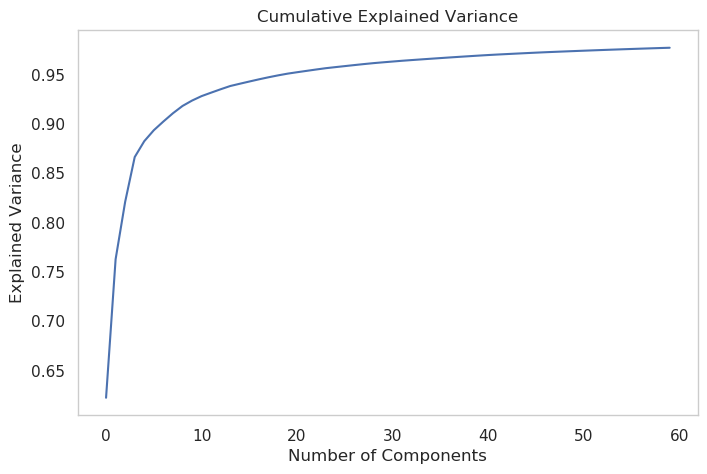

In [58]:
# Plot Results
plt.rcParams['axes.linewidth'] = 1.0


sns.set_style("whitegrid")

fsize = 15
tsize = 11
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
# Plot cumsum of explained variance
cumsum = np.cumsum(mm.pca.explained_variance_ratio_)
plt.figure(figsize=(8,5), dpi=100)
plt.plot(cumsum, label="Cumulative Explained Variance")
# plot horizontal line at 95% variance until graph intersects
#plt.hlines(.95, xmax=np.argmax(cumsum>0.95), xmin=0, label="95% Explained Variance", linestyles="dashed", alpha = 0.5)
#plt.vlines(np.argmax(cumsum>0.95), ymin=cumsum.min(), ymax=.95, linestyles="dashed", alpha = 0.5)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Cumulative Explained Variance")
plt.grid()
#plt.legend()
plt.savefig("../data/plots/cumsum.png", dpi=300, bbox_inches="tight")

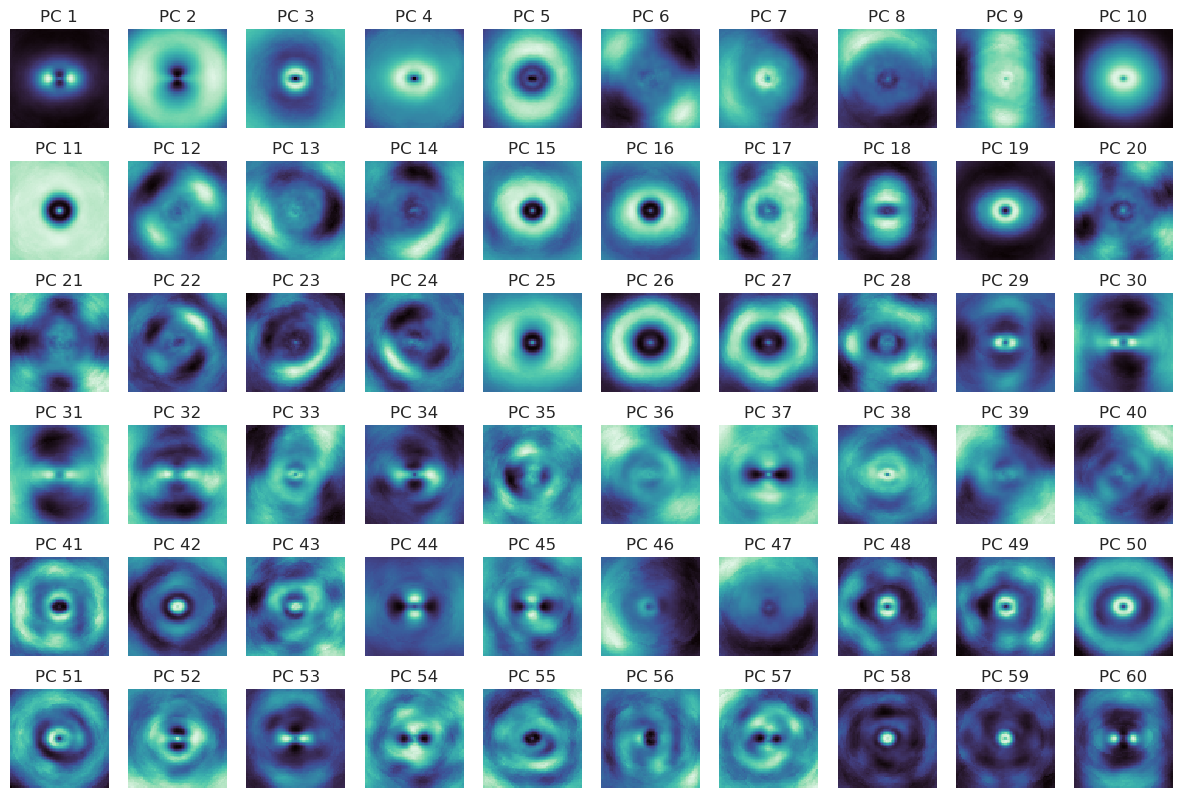

In [33]:
# Plot all 60 eigengalaxies in a grid
eigenimages = mm.get_eigengalaxies()
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.color_palette("mako", as_cmap=True)
fig, axes = plt.subplots(6,10, figsize=(15,10), dpi=100)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenimages[i][0], origin="lower", cmap=cmap)
    ax.axis("off")
    ax.set_title("PC {}".format(i+1))

In [ ]:
ORDER = ["Masses", "GFM_Metallicity", "GFM_StellarFormationTime"]

In [37]:
mm._IMG_ORDER

['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']

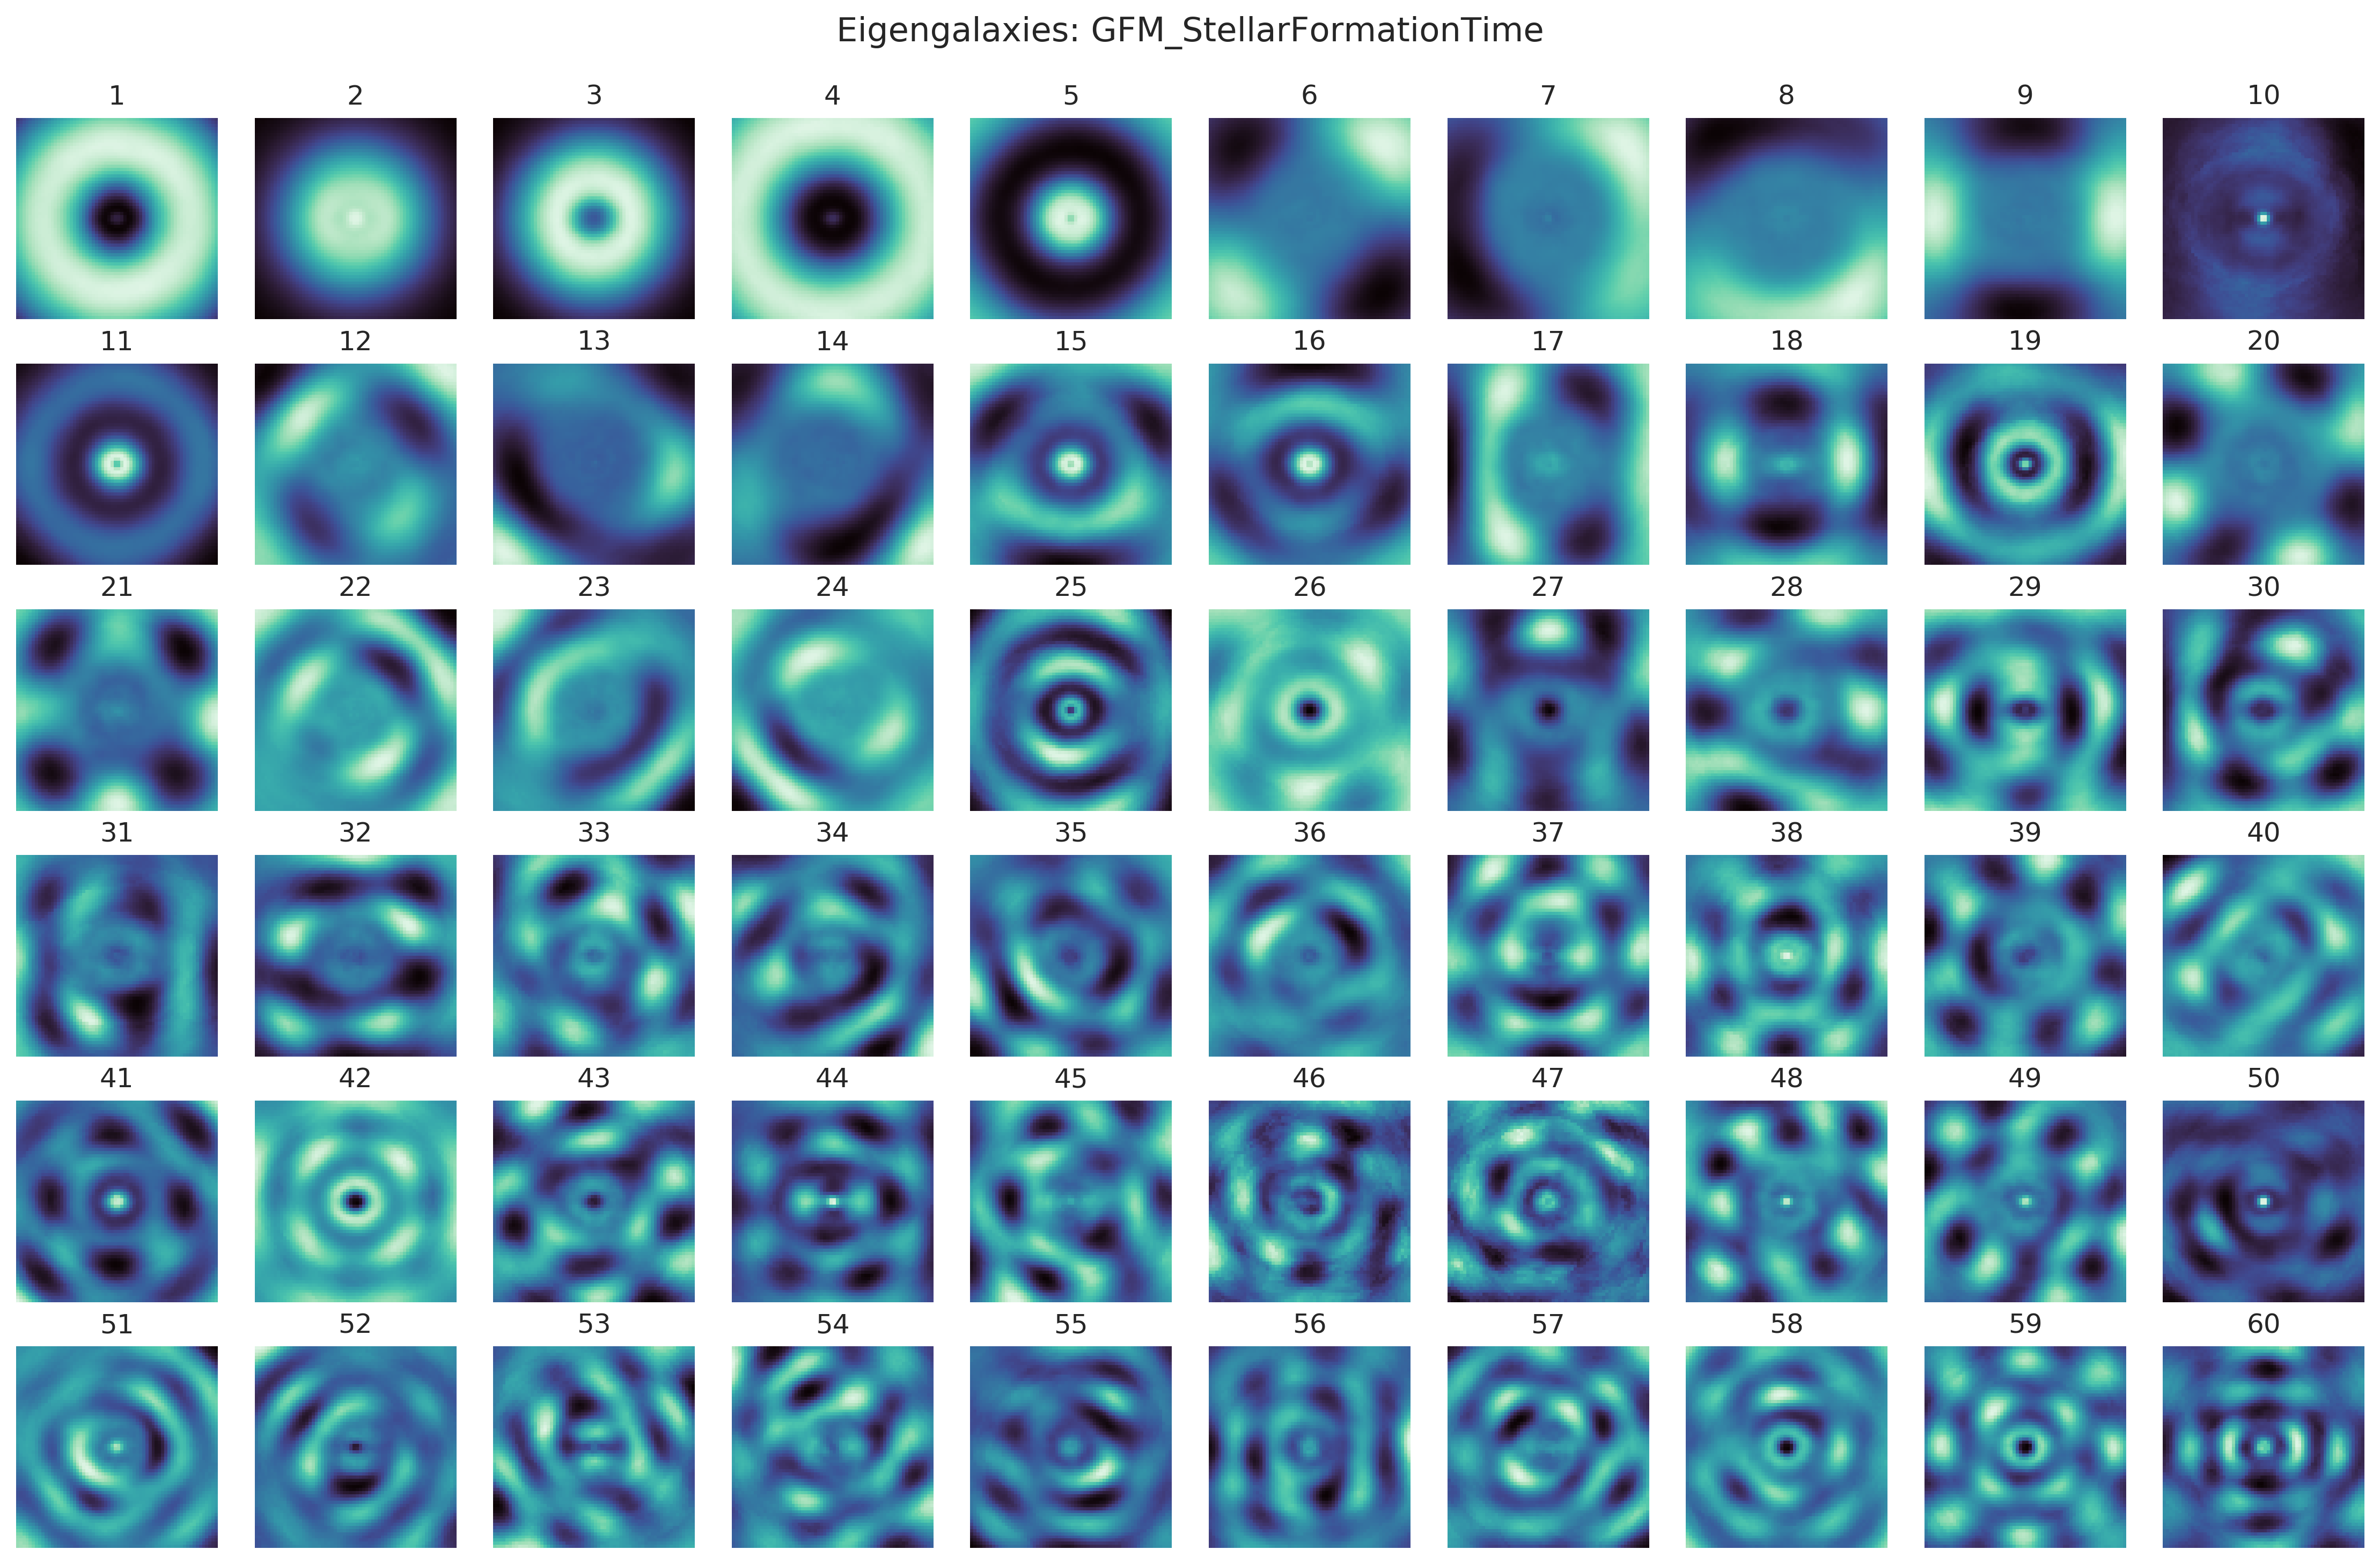

In [57]:

j=1
cmap = sns.color_palette("mako", as_cmap=True)
fig, axes = plt.subplots(6,10, figsize=(15,10), dpi=300)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenimages[i][j], origin="lower", cmap=cmap)
    ax.axis("off")
    ax.set_title(f"{i+1}")
fig.suptitle(f"Eigengalaxies: {mm._IMG_ORDER[j]}", fontsize=15)

fig.tight_layout(rect=[0, 0.01, 1, 0.95])
fig.savefig(f"../data/plots/eigengalaxies_{mm._IMG_ORDER[j]}.eps", dpi=300)